# EE2211-Tut5
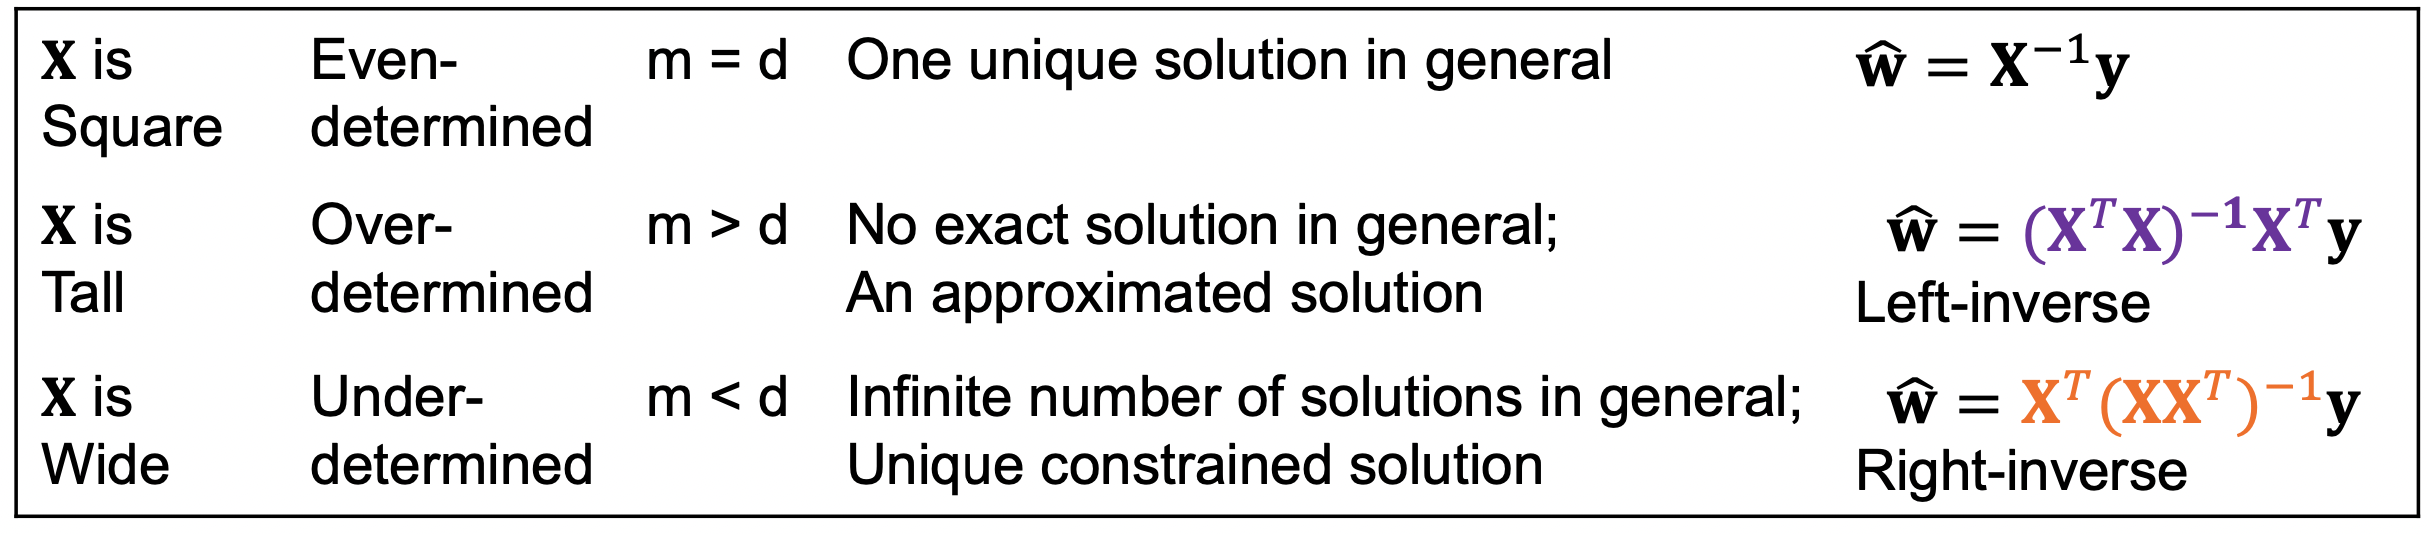

In [1]:
import numpy as np
from numpy.linalg import inv
from numpy.linalg import det

def check_invertibility(X):
    # X is a (m,d) matrix. m is samples, d is features
    # outputs true false values for (left_inverse_exist,right_inverse_exists)
    left_inv_exist = True if (det(X.T @X) != 0) else False
    right_inv_exist = True if (det(X @ X.T)!= 0) else False
    return (left_inv_exist,right_inv_exist)

def apply_left_inverse(X, y):
    # X as a (m,d) matrix must be overdetermined: m > d
    # y is a d-tuple
    # assumes that X^T @ X is invertible
    w = inv(X.T @ X) @ X.T @ y
    return w
    
def apply_right_inverse(X,y):
    # X is a 2d (m,d)-ndarray
    # X as a (m,d) matrix must be under-determined: m < d
    # y is a 1d (d)-ndarray
    # assumes that X @ X^T  is invertible
    w = X.T @ inv(X @ X.T) @ y
    return w

# Question 1
<div>
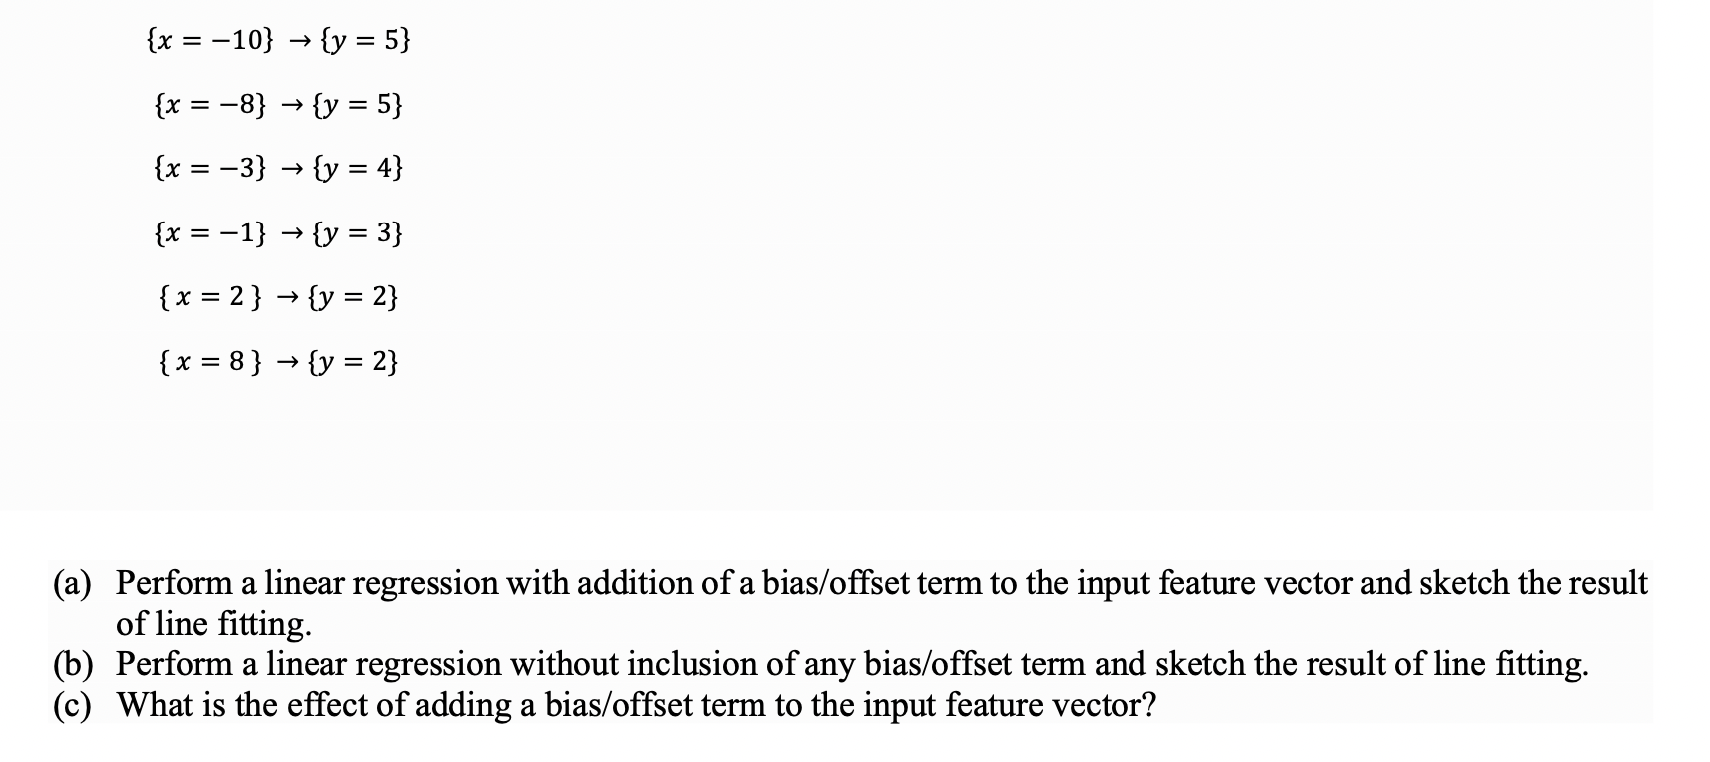
</div>

In [4]:
X = np.array([-10,-8,-3,-1,2,8]).reshape(6,1)
y = np.array([5,5,4,3,2,2]).reshape(6,1)
# part (b) no bias term: Xw = y, overdetermined
w_nb = apply_left_inverse(X,y) #left-inverse
# part (a) with bias term Xw + b = y <-> equivalently X_aug w_aug = y
# w_aug is w plus a last entry equal to 1
# X_aug is X with a last row given by 1
X_aug = np.vstack([[1] * X.shape[0],X.T]).T
w_aug = apply_left_inverse(X_aug,y)

#show results
print('X:\n',X)
print('X_aug:\n', X_aug)
print('w_nb:', w_nb) # one regression coefficient
print('w_aug:', w_aug) 

X:
 [[-10]
 [ -8]
 [ -3]
 [ -1]
 [  2]
 [  8]]
X_aug:
 [[  1 -10]
 [  1  -8]
 [  1  -3]
 [  1  -1]
 [  1   2]
 [  1   8]]
w_nb: [[-0.35123967]]
w_aug: [[ 3.10550459]
 [-0.19724771]]


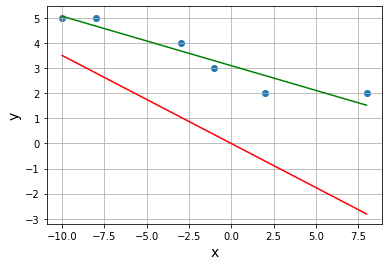

In [5]:
from matplotlib import pyplot as plt
y_pred_no_bias = X * w_nb #y = mx
y_pred_w_bias = X_aug @ w_aug # y = mx + b
  
plt.scatter(X, y, marker='o')
plt.plot(X, y_pred_no_bias, color = 'red')
plt.plot(X, y_pred_w_bias, color = 'green')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.grid(True)
plt.show()

# Question 2
<div>
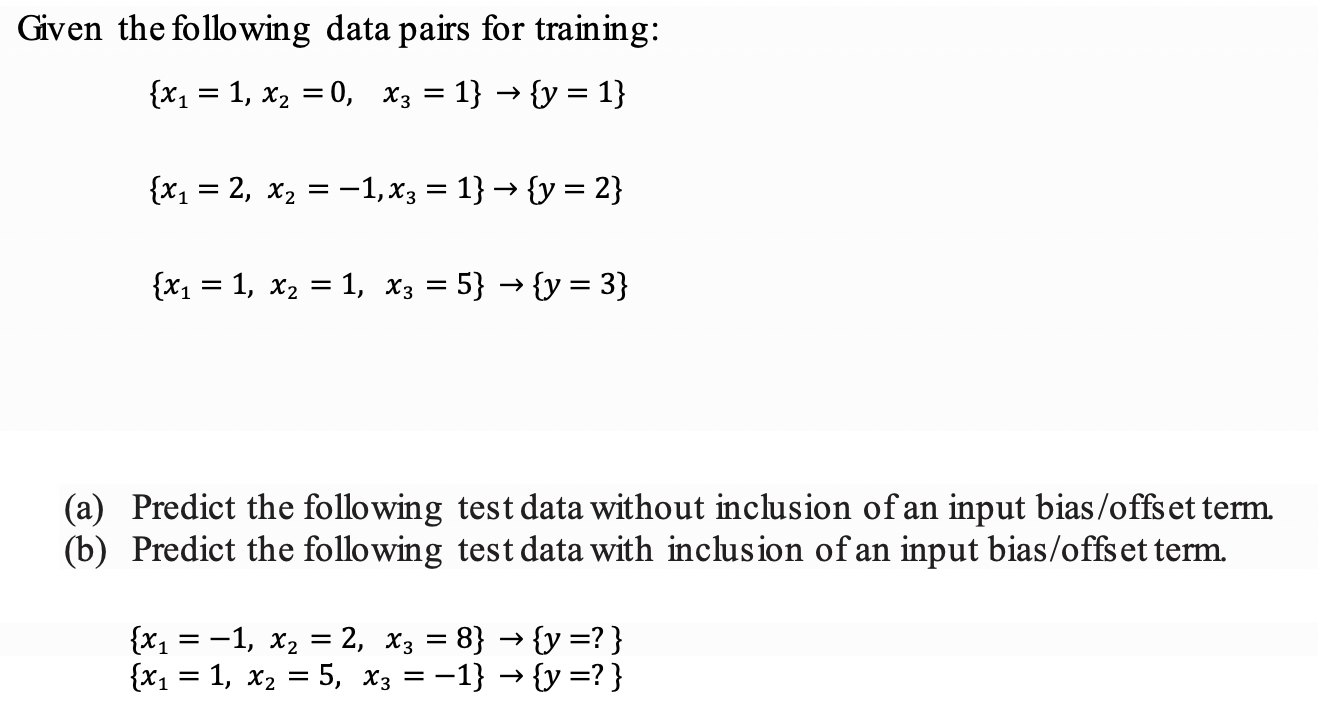
</div>

In [2]:
y = np.array([1,2,3]).reshape(3,1)
X = np.array([1,0,1,2,-1,1,1,1,5]).reshape(3,3)
X_aug = np.vstack([[1] * X.shape[0],X.T]).T #include offset term
w_nb = apply_left_inverse(X,y) #implementing w = X^{-1} y
w_aug = apply_right_inverse(X_aug,y) #implements w = right-inverse @ y

#testing linear relation
X_test = np.array([-1,2,8,1,5,-1]).reshape(2,3)
y_pred = X_test @ w_nb

#testing affine relation
X_test_aug = np.vstack([[1] * X_test.shape[0],X_test.T]).T # add ones to X
y_pred_wb = X_test_aug @ w_aug


print('X:\n',X)
print('X_aug:\n', X_aug)
print('X_test:\n',X_test)
print('X_test_aug:\n',X_test_aug)
print('\nw_nb:', w_nb) # one regression coefficient
print('w_aug:', w_aug)

print('\ny_predicted_wb:\n',y_pred_wb)
print('y_predicted:\n',y_pred)

X:
 [[ 1  0  1]
 [ 2 -1  1]
 [ 1  1  5]]
X_aug:
 [[ 1  1  0  1]
 [ 1  2 -1  1]
 [ 1  1  1  5]]
X_test:
 [[-1  2  8]
 [ 1  5 -1]]
X_test_aug:
 [[ 1 -1  2  8]
 [ 1  1  5 -1]]

w_nb: [[ 0.33333333]
 [-0.66666667]
 [ 0.66666667]]
w_aug: [[-0.14285714]
 [ 0.52380952]
 [-0.47619048]
 [ 0.61904762]]

y_predicted_wb:
 [[ 3.33333333]
 [-2.61904762]]
y_predicted:
 [[ 3.66666667]
 [-3.66666667]]


# Question 4 (and 3)
<div>
<img src="attachment:tut5-q4-1.png" width="500"/>
</div>


<div>
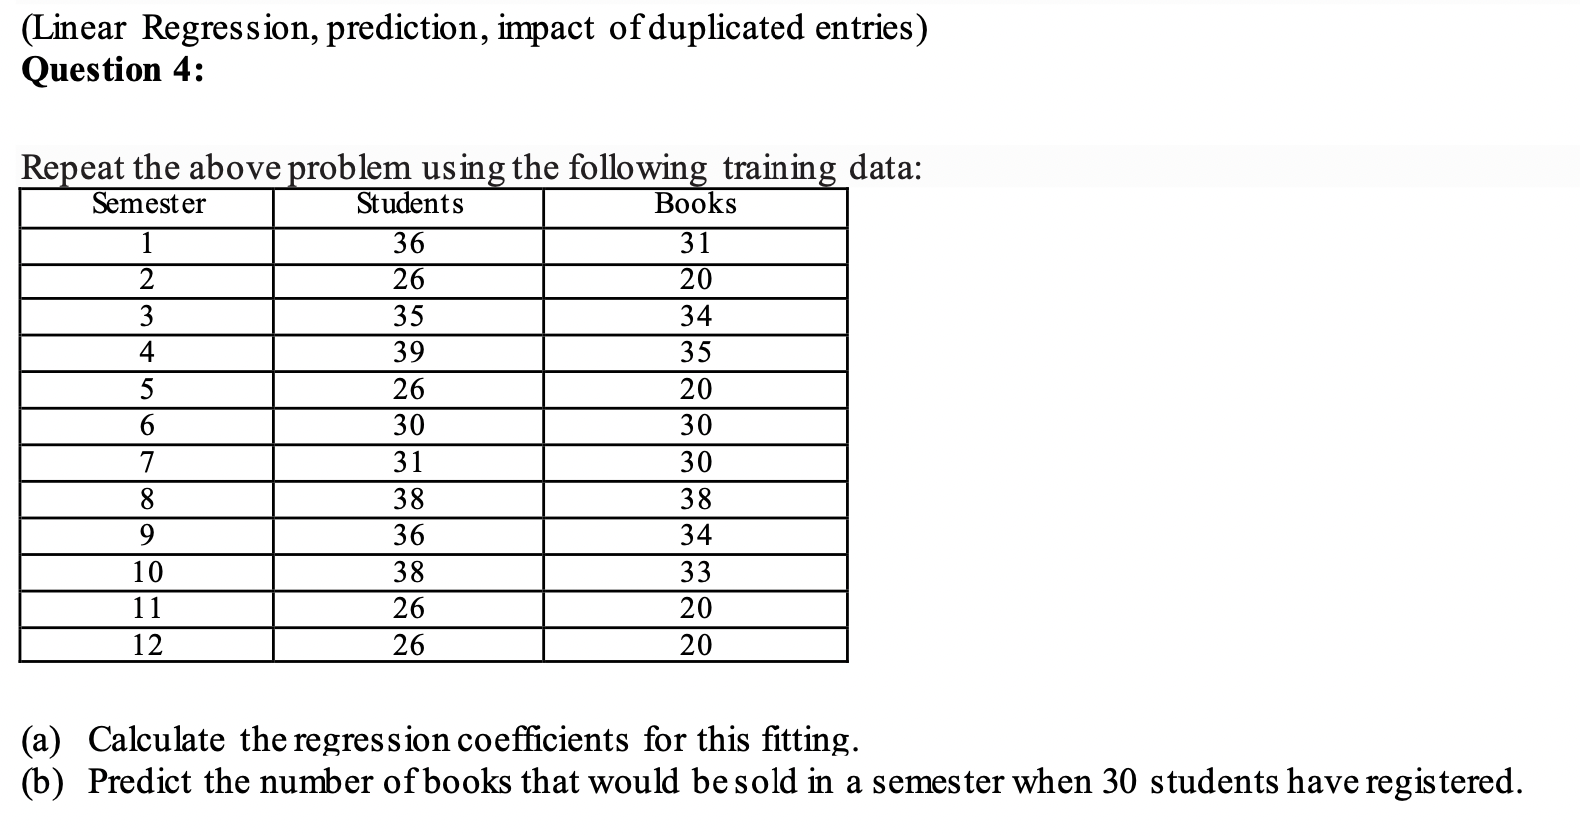
</div>
<div>
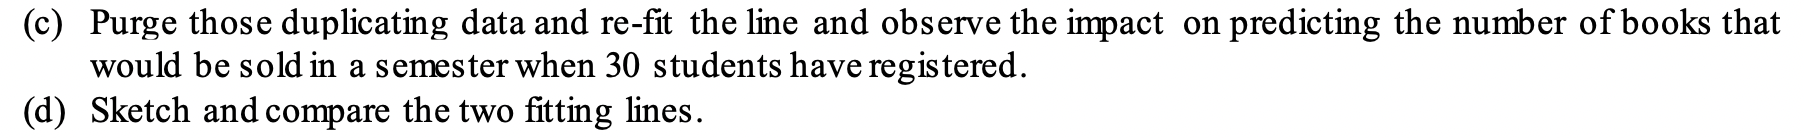
</div>

In [5]:
# part (a) and (b)
X = np.array([36,26,35,39,26,30,31,38,36,38,26,26]).reshape(12,1)
y = np.array([31,20,34,35,20,30,30,38,34,33,20,20]).reshape(12,1)
X_aug = np.vstack([X.T,[1] * X.shape[0]]).T
w_aug = apply_left_inverse(X_aug,y) # 12 x 2 matrix
X_test_aug = np.array([30,1]) # x = 30, extra column of 1 for the offset term
y_pred = X_test_aug @ w_aug

print('X:\n',X)
print('X_aug:\n', X_aug)
print('w:', w_aug)
print('y_test:\n',y_pred)

X:
 [[36]
 [26]
 [35]
 [39]
 [26]
 [30]
 [31]
 [38]
 [36]
 [38]
 [26]
 [26]]
X_aug:
 [[36  1]
 [26  1]
 [35  1]
 [39  1]
 [26  1]
 [30  1]
 [31  1]
 [38  1]
 [36  1]
 [38  1]
 [26  1]
 [26  1]]
w: [[  1.21434327]
 [-10.41257051]]
y_test:
 [26.01772764]


In [17]:
# part (c): handling duplicates ... 
X_pre = [36,26,35,39,26,30,31,38,36,38,26,26]
y_pre = [31,20,34,35,20,30,30,38,34,33,20,20]
X_data, y_data = [], []
my_set = set()
for i in range(len(X_pre)):
    if (X_pre[i], y_pre[i]) not in my_set:
        X_data.append(X_pre[i])
        y_data.append(y_pre[i])
        my_set.add((X_pre[i], y_pre[i]))

print('X_data: ',X_data)
# do linear regression now
X_noduplicate = np.array(X_data).reshape(len(X_data),1)
y_noduplicate = np.array(y_data).reshape(len(y_data),1)
X_noduplicate_aug = np.vstack([X_noduplicate.T,[1] * X_noduplicate.shape[0]]).T
w_noduplicate = apply_left_inverse(X_noduplicate_aug,y_noduplicate)

X_data:  [36, 26, 35, 39, 30, 31, 38, 36, 38]


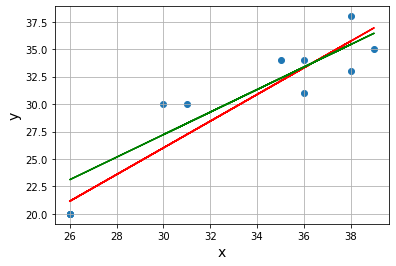

In [18]:
from matplotlib import pyplot as plt
y_with_dup = X_aug @ w #y = mx + b, with duplicates
y_no_dup = X_noduplicate_aug @ w_noduplicate # y = mx + b, no duplicates
  
plt.scatter(X, y, marker='o')
plt.plot(X, y_with_dup, color = 'red')
plt.plot(X_noduplicate, y_no_dup, color = 'green')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.grid(True)
plt.show()

# Question 6
<div>
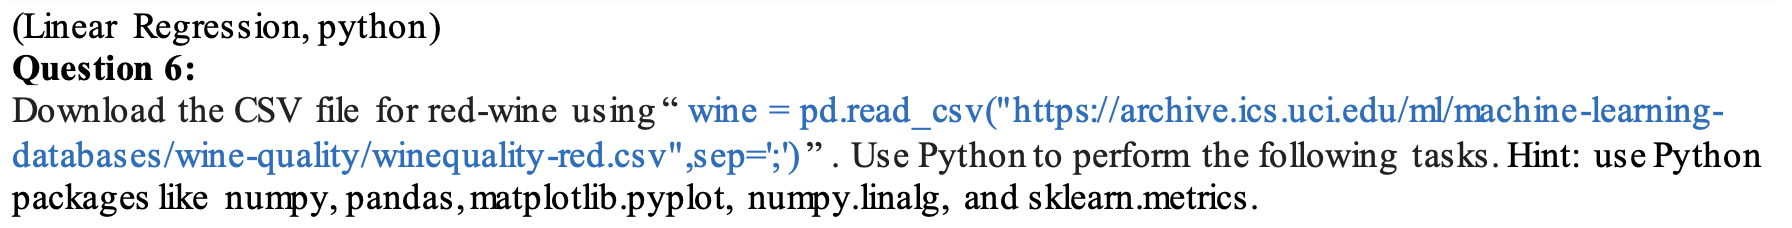
</div>
<div>
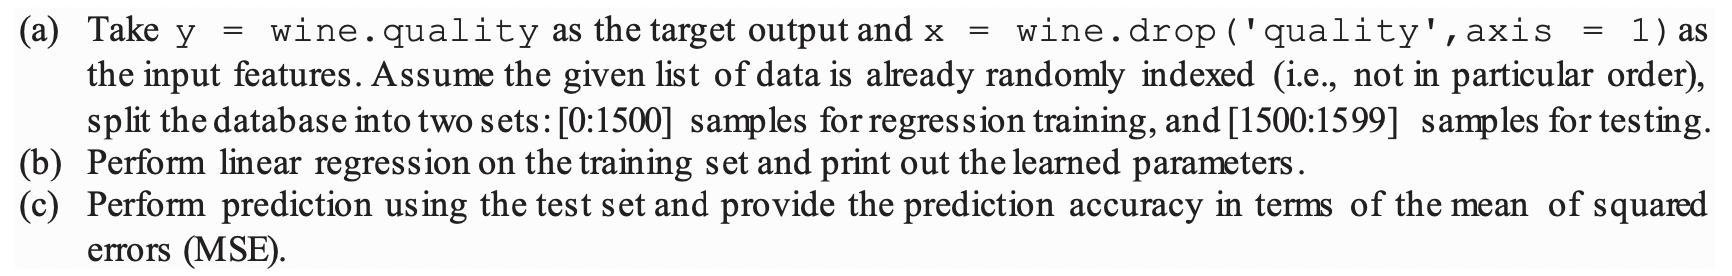
</div>

In [19]:
import pandas as pd
#import matplotlib.pyplot as plt
#import numpy as np
from numpy.linalg import inv
from sklearn.metrics import mean_squared_error

## get data from web
wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",sep=';')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [20]:
# data preparation
y = wine.quality
x = wine.drop('quality',axis = 1)
## Include the offset/bias term
x0 = np.ones((len(y),1)) 
X = np.hstack((x0,x))  # augment X for linear regression with affine line

## (Note: this exercise introduces the basic protocol of using the training-test partitioning of samples for evaluation assuming the list of data is already randomly indexed)

## In case you really want a general random split to have a better training/ test distributions:
## from sklearn.model_selection import train_test_split
## train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=99/1599, random_state = 0)

## naive splitting
train_X = X[0:1500]
train_y = y[0:1500] 
test_X = X[1500:1599] 
test_y = y[1500:1599]

## linear regression
w = inv(train_X.T @ train_X) @ train_X.T @ train_y # primal form, left inverse
print(w)
yt_est = test_X.dot(w); #part d: prediction

[ 2.22330327e+01  2.68702621e-02 -1.12838019e+00 -2.06141685e-01
  1.22000584e-02 -1.77718502e+00  4.29357454e-03 -3.18953315e-03
 -1.81795125e+01 -3.98142390e-01  8.92474793e-01  2.77147239e-01]


In [21]:
MSE = np.square(test_y - yt_est).mean()  # part d: MSE formula
print(MSE)

0.34352638104202055


In [22]:
MSE = mean_squared_error(test_y,yt_est) #part d: MSE via code
print(MSE)

0.34352638104202055


# Question 9: Linear Regression with Multiple Outputs
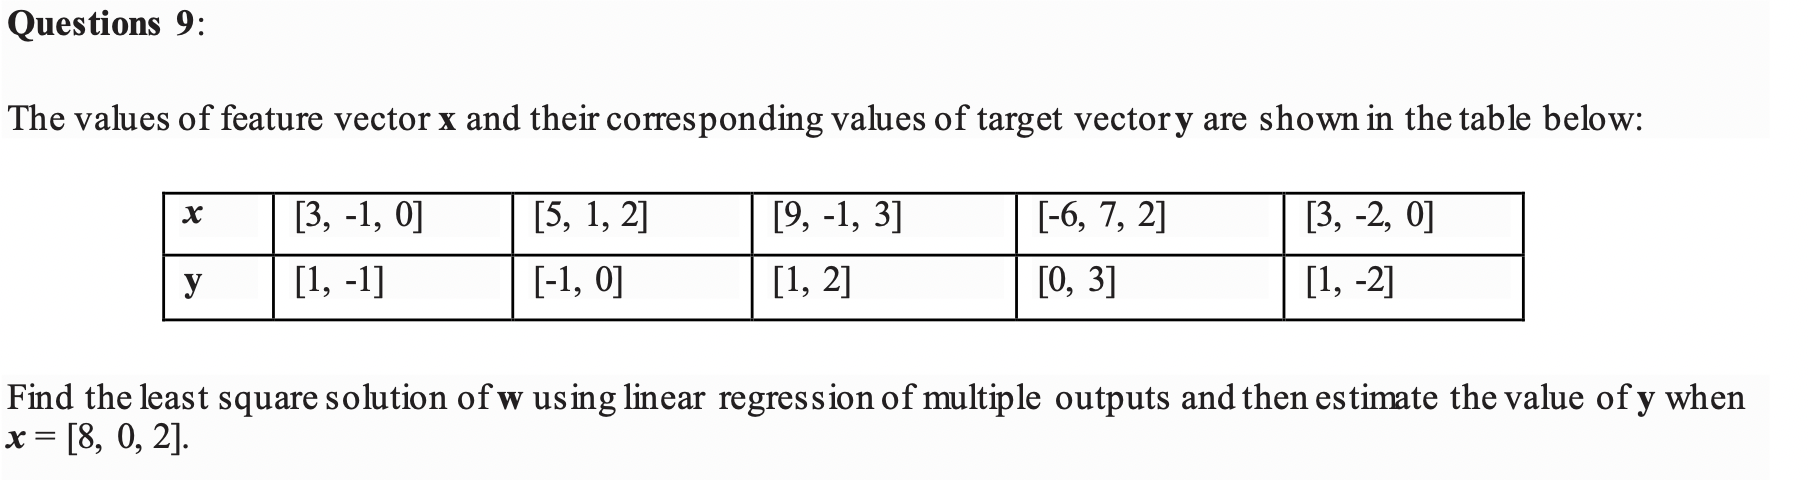

In [37]:
import numpy as np
from numpy.linalg import inv
X_aug = np.array([[1, 3, -1, 0], [1, 5, 1, 2], [1, 9, -1, 3], [1, -6, 7, 2], [1, 3, -2, 0]]) 
# placed a coefficient of 1 in front for the offset term. question wasn't clear so either way is fine
Y = np.array([[1, -1], [-1, 0], [1, 2], [0, 3], [1, -2]]) 
W = inv(X_aug.T @ X_aug) @ X_aug.T @ Y # left inverse
print('X_aug:\n',X_aug)
print('Y:\n',Y)
print('W:\n',W)

X_aug:
 [[ 1  3 -1  0]
 [ 1  5  1  2]
 [ 1  9 -1  3]
 [ 1 -6  7  2]
 [ 1  3 -2  0]]
Y:
 [[ 1 -1]
 [-1  0]
 [ 1  2]
 [ 0  3]
 [ 1 -2]]
W:
 [[ 1.14668974 -0.95997404]
 [-0.630463   -0.33427088]
 [-1.10601471 -0.24426655]
 [ 1.3595846   1.77953267]]


In [38]:
newX=np.array([1, 8, 0, 2]) #augmented for offset term
newY=newX@W
print(newY)

[-1.17784509 -0.07507572]
